## Working on Airline dataset using RNN

In [1]:
!pip install keras==2.3.1

### Preparing data for RNN

In [1]:
from pandas import read_csv

In [3]:
read_csv('/Users/shabeggill/Downloads/international-airline-passengers.csv')

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# We just care about 12 months followed by the O/P. What months they were don't really matter for us.
# So we'll get rid of the month column.

read_csv('/Users/shabeggill/Downloads/international-airline-passengers.csv',usecols=[1]) # To use only 1st column

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [2]:
import pandas as pd
df=pd.read_csv('/Users/shabeggill/Downloads/international-airline-passengers.csv',usecols=[1])
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [3]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
#Fetching values out of the dataframe. These are integer values and we'll convert them into float
values=df.values.astype('float32')
values

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [6]:
values.shape

(144, 1)

In [7]:
values.shape[0]

144

In [8]:
# Before doing any scaling, I'm going to splt into raining and testing
# While we do scaling, we're going to fit on the training data, then tranform the testing data

train_size=(values.shape[0]*0.67)
train_size

96.48

In [9]:
#Gives 96.48 so we convert the above to an integer
train_size=int(values.shape[0]*0.67)
train_size # We keep 2/3rd data as training and 1/3rd as testing

96

In [10]:
test_size=values.shape[0]-train_size
test_size

48

In [11]:
train=values[0:train_size] #Training data
test=values[train_size:] #Testing data

In [12]:
#Need to scale this now
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

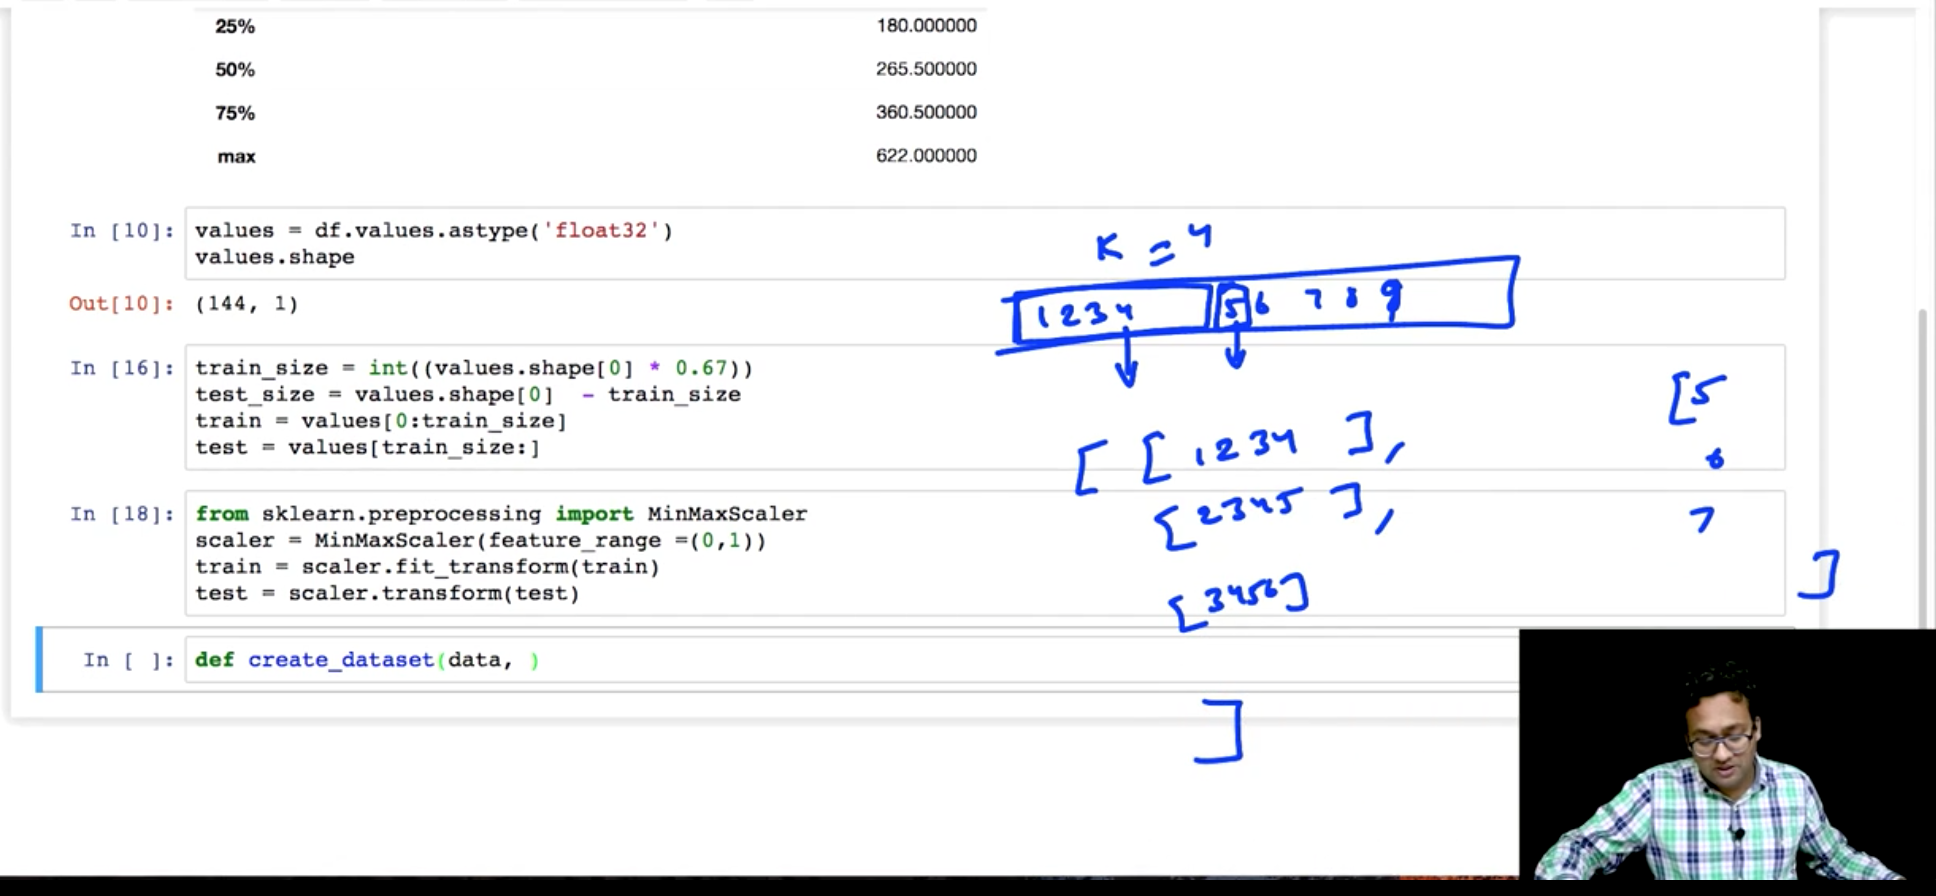

In [13]:
import numpy as np
#Writing a function which creates the actual dataset as shown in the image above with K=4 being the window size
def create_dataset(data,k):
    dataX,dataY=[],[] #Taking both to be lists
    #If I have 100 data points and k=5, then I have 95 data points
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0] #need to go from i to i+k
        y=data[i+k,0]
        #Basically means that if I have 100 data points, the first can start from 0,1,2,3,4 for k=5 and 5 would be the
        # O/P value. The last one I can go to would be 94. Since 94,95,96,97,98 as x and last entry i.e. 99 as the O/P
        
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)
    

In [17]:
look_back=12
test_data=create_dataset(test,look_back) #Calling the function on test data
test_data
#We get 2 arrays here. 2nd one being the list of y's. 1st one is an array of array where each entry is previous 12 
# months data. We had scaled it to be from 0-1 then why are we getting values higher than 1. This is because this is 
# testing data, we had fit the transform using training data. Testing data can be more

(array([[0.682848  , 0.63754046, 0.815534  , 0.7896441 , 0.8122978 ,
         1.0291263 , 1.1682849 , 1.1747574 , 0.97087383, 0.7864078 ,
         0.6504855 , 0.7508091 ],
        [0.63754046, 0.815534  , 0.7896441 , 0.8122978 , 1.0291263 ,
         1.1682849 , 1.1747574 , 0.97087383, 0.7864078 , 0.6504855 ,
         0.7508091 , 0.7637541 ],
        [0.815534  , 0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 ,
         1.1747574 , 0.97087383, 0.7864078 , 0.6504855 , 0.7508091 ,
         0.7637541 , 0.69255674],
        [0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 ,
         0.97087383, 0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 ,
         0.69255674, 0.8349515 ],
        [0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 , 0.97087383,
         0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 , 0.69255674,
         0.8349515 , 0.7896441 ],
        [1.0291263 , 1.1682849 , 1.1747574 , 0.97087383, 0.7864078 ,
         0.6504855 , 0.7508091 , 0.7637541 , 0.69255674, 0.8349515 ,
  

In [18]:
train_data=create_dataset(train,look_back) #Calling the function on train data
train_data

(array([[0.02588999, 0.04530746, 0.09061491, ..., 0.04854369, 0.        ,
         0.04530746],
        [0.04530746, 0.09061491, 0.08090615, ..., 0.        , 0.04530746,
         0.03559873],
        [0.09061491, 0.08090615, 0.05501619, ..., 0.04530746, 0.03559873,
         0.07119742],
        ...,
        [0.55016184, 0.43042073, 0.5631068 , ..., 1.0000001 , 0.9741101 ,
         0.8122978 ],
        [0.43042073, 0.5631068 , 0.5825243 , ..., 0.9741101 , 0.8122978 ,
         0.6537217 ],
        [0.5631068 , 0.5825243 , 0.5598706 , ..., 0.8122978 , 0.6537217 ,
         0.5404531 ]], dtype=float32),
 array([0.03559873, 0.07119742, 0.11974111, 0.10032365, 0.06796119,
        0.14563107, 0.21359226, 0.21359226, 0.17475727, 0.09385115,
        0.03236246, 0.11650488, 0.13268611, 0.14886734, 0.2394822 ,
        0.1909385 , 0.22006473, 0.2394822 , 0.3074434 , 0.3074434 ,
        0.25889972, 0.18770227, 0.13592234, 0.20064726, 0.2168285 ,
        0.24595472, 0.2880259 , 0.24919096, 0.25566342

### Setting up the RNN model

In [23]:
# We'll have the sequence (x data) which will pass through the RNN layer (say it has 4 units) and the O/P of these 
#4 units will be passed through the dense layer to get the O/P. The deafult activation function that we use in case
#of RNN layers is tanh and the RNN implementation that we will be using is called simple RNN

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [29]:
look_back=12
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [25]:
trainX.shape, trainY.shape
#There is a problem with trainX shape. There are 84 data points and each data point is a sequence having 12 entries
#This is not the format that RNN requires. I have 84 data points. Each of them is a sequence. But this sequence
# is of multiple features combined. For example say we have 100 videos, each video is of 12 images, each of these
# images will have a lot of features. So the shape has to be 3D. First dimension defines number of training data points,
#second defines length of sequence, third defines number of features in each timeframe.

#So right now that isn't the shape that we have for our data. We'll be required to reshape it

((84, 12), (84,))

In [33]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1)) #First and second dimensions are same. Just need to add
# third dimension which is 1 in our case
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

trainX.shape,testX.shape

((84, 12, 1), (36, 12, 1))

In [93]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1))) #SimpleRNN requires the number of units (4 here) and the input shape
model.add(Dense(1)) #Adding the Dense layer with just 1 unit in it
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=1000,batch_size=1)

#What is the I/P that the RNN layer is going to get. Each data point has a sequence which is representing different
# timeframes but within each timeframe you only have one feature. The I/P shape is thus basically how much timeframe
# you're looking back at (i.e. the look_back) and the no. of features

Epoch 1/1000
84/84 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 2/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 3/1000
84/84 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 4/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 5/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 6/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 7/1000
84/84 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 8/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 9/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 10/1000
84/84 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 11/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 12/1000
84/84 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 13/1000
84/84 [====

### Analyzing the Output

In [94]:
testX.shape

(36, 12, 1)

In [95]:
testPredict=model.predict(testX)
testPredict

array([[0.78682137],
       [0.77866894],
       [0.86158586],
       [0.8872463 ],
       [0.91213727],
       [1.0042713 ],
       [1.087416  ],
       [1.0965967 ],
       [1.0415375 ],
       [0.839882  ],
       [0.78588235],
       [0.7839316 ],
       [0.8424406 ],
       [0.81477505],
       [0.892356  ],
       [0.9143978 ],
       [0.9676503 ],
       [1.0471545 ],
       [1.1070926 ],
       [1.1190987 ],
       [1.0501367 ],
       [0.9000579 ],
       [0.7875845 ],
       [0.83711386],
       [0.9038317 ],
       [0.8980398 ],
       [0.9458773 ],
       [0.9681813 ],
       [1.050646  ],
       [1.0721977 ],
       [1.1260471 ],
       [1.1322975 ],
       [1.0727236 ],
       [0.927245  ],
       [0.91417944],
       [0.8438443 ]], dtype=float32)

In [96]:
#Unscaling the data
testPredict=scaler.inverse_transform(testPredict)
testPredict

array([[347.12778],
       [344.6087 ],
       [370.23   ],
       [378.15912],
       [385.8504 ],
       [414.3198 ],
       [440.01154],
       [442.84836],
       [425.83508],
       [363.52353],
       [346.83762],
       [346.23483],
       [364.31412],
       [355.76547],
       [379.738  ],
       [386.54892],
       [403.0039 ],
       [427.57074],
       [446.09158],
       [449.80145],
       [428.49222],
       [382.11786],
       [347.36362],
       [362.66815],
       [383.28397],
       [381.4943 ],
       [396.27606],
       [403.16803],
       [428.64957],
       [435.30905],
       [451.94855],
       [453.8799 ],
       [435.4716 ],
       [390.51868],
       [386.4814 ],
       [364.74786]], dtype=float32)

In [97]:
testPredict.shape

(36, 1)

In [98]:
#Converting testPredict to 1-D
testPredict=scaler.inverse_transform(testPredict).ravel()
testPredict.shape

(36,)

In [99]:
#Repeating the above steps for training data
trainPredict=model.predict(trainX)
trainPredict

array([[0.06975321],
       [0.06917004],
       [0.10909896],
       [0.12204348],
       [0.09510495],
       [0.10471143],
       [0.17339961],
       [0.19014002],
       [0.15531258],
       [0.11445455],
       [0.07209457],
       [0.07133587],
       [0.12521763],
       [0.13955824],
       [0.16904972],
       [0.20089714],
       [0.1491463 ],
       [0.2251101 ],
       [0.25189778],
       [0.2974206 ],
       [0.23867695],
       [0.18783681],
       [0.1365578 ],
       [0.17664237],
       [0.20422967],
       [0.2390473 ],
       [0.27615547],
       [0.27739292],
       [0.2586394 ],
       [0.29266548],
       [0.39978647],
       [0.37612158],
       [0.37020943],
       [0.24340932],
       [0.23808254],
       [0.2293209 ],
       [0.31502545],
       [0.28779116],
       [0.3596359 ],
       [0.34458613],
       [0.37935862],
       [0.40552765],
       [0.51159334],
       [0.5146503 ],
       [0.44761667],
       [0.33617893],
       [0.28857192],
       [0.302

In [100]:
trainPredict=scaler.inverse_transform(trainPredict).ravel()
trainPredict

array([125.553734, 125.373535, 137.71156 , 141.71143 , 133.38744 ,
       136.35583 , 157.58047 , 162.75327 , 151.99158 , 139.36644 ,
       126.27722 , 126.042786, 142.69225 , 147.12349 , 156.23636 ,
       166.07721 , 150.0862  , 173.559   , 181.83641 , 195.90295 ,
       177.75116 , 162.04156 , 146.19635 , 158.58249 , 167.10696 ,
       177.86562 , 189.33203 , 189.71442 , 183.91957 , 194.43362 ,
       227.534   , 220.22157 , 218.3947  , 179.21347 , 177.5675  ,
       174.86015 , 201.34285 , 192.92746 , 215.12749 , 210.4771  ,
       221.2218  , 229.30804 , 262.08234 , 263.02695 , 242.31354 ,
       207.87929 , 193.16872 , 197.40442 , 212.02559 , 209.85469 ,
       237.73988 , 253.049   , 242.34258 , 258.9782  , 294.90945 ,
       306.2851  , 260.78833 , 236.28354 , 195.36484 , 223.00288 ,
       216.97437 , 227.20451 , 246.25664 , 262.27118 , 259.17142 ,
       297.56183 , 343.3705  , 342.67294 , 298.5965  , 265.0567  ,
       225.6497  , 253.42538 , 271.9629  , 267.8976  , 298.429

In [101]:
#When we are inverse transforming testY and trainY are 1-D. Converting to 2-D by putting [] around them
testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue=scaler.inverse_transform([trainY]).ravel()

testPredict.shape,testTrue.shape

((36,), (36,))

In [102]:
trainPredict.shape,trainTrue.shape

((84,), (84,))

In [103]:
#What we've done above is basically this
testPredict=model.predict(testX)
testPredict=scaler.inverse_transform(testPredict).ravel()

trainPredict=model.predict(trainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()

testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue=scaler.inverse_transform([trainY]).ravel()


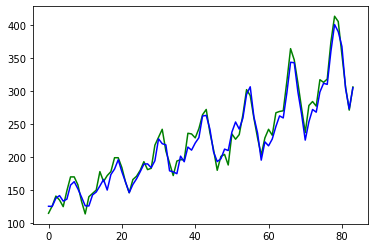

In [104]:
#Plot it for training
from matplotlib import pyplot as plt
plt.plot(trainTrue,c='g')
plt.plot(trainPredict,c='b')
plt.show()

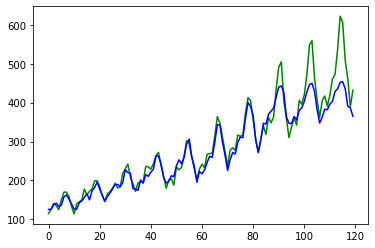

In [105]:
#Combining training and testing and then seeing the plot
combinedPredicted=np.concatenate((trainPredict,testPredict))
combinedTrue=np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c='g')
plt.plot(combinedPredicted,c='b')
plt.show()